# Nobel Prize Data Analysis

# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates.

# Import Statements

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

# Read the Data

In [3]:
df_data = pd.read_csv('nobel_prize_data.csv')
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name  birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff  1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme  1839-03-16              Paris   
2    Individual        Emil Adolf von Behring  1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy  1822-05-20              Paris   
4    Individual             Jean Henry Dunant  1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  
0            Berlin              Germany  NLD  
1               NaN                  NaN  FRA  
2           Marburg              Germany  POL  
3               NaN                  NaN  FRA  
4               NaN                  NaN  CHE

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Preliminary Data Exploration

In [4]:
df_data.shape

(962, 16)

The dataset has 962 rows and 16 coloumns.

In [5]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [6]:
# Earliest year in the dataset
first_nobel = df_data.query('year == year.min()')
first_nobel.iloc[0].year

1901

**1901** was the year when the first Nobel Prize was awarded.

In [7]:
# latest year in the dataset
latest_nobel = df_data[df_data.year == df_data.year.max()]
latest_nobel.iloc[0].year

2020

**2020** is the latest year in the dataset.

# Data Cleaning and Reshaping

### Check for Duplicates

In [8]:
df_data.duplicated().any()

False

The dataset is free from duplicates

### Check for NaN Values

In [9]:
df_data.isna().values.any()

True

In [10]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [11]:
df_subset = ["year", "category", "laureate_type", "full_name", "birth_date", "organization_name", "sex"]
df_data[df_data.birth_date.isna()][df_subset].head()

year category laureate_type  \
24   1904    Peace  Organization   
60   1910    Peace  Organization   
89   1917    Peace  Organization   
200  1938    Peace  Organization   
215  1944    Peace  Organization   

                                             full_name birth_date  \
24   Institut de droit international (Institute of ...        NaN   
60   Bureau international permanent de la Paix (Per...        NaN   
89   Comité international de la Croix Rouge (Intern...        NaN   
200  Office international Nansen pour les Réfugiés ...        NaN   
215  Comité international de la Croix Rouge (Intern...        NaN   

    organization_name  sex  
24                NaN  NaN  
60                NaN  NaN  
89                NaN  NaN  
200               NaN  NaN  
215               NaN  NaN

**Observation:**  
Here, it is observed that these laureates are organizations like UNICEF, WFP, etc.
Therefore, the birth date and sex having NaN values makes sense. 

Also, we noticed that even the organization_name column for these laureates contains NaN values. A possible reason for this might be because the name of the organization is written in full_name coloumn.

In [12]:
df_data[df_data.organization_name.isna()][df_subset]

year    category laureate_type                           full_name  \
1    1901  Literature    Individual                     Sully Prudhomme   
3    1901       Peace    Individual                      Frédéric Passy   
4    1901       Peace    Individual                   Jean Henry Dunant   
7    1902  Literature    Individual  Christian Matthias Theodor Mommsen   
9    1902       Peace    Individual                Charles Albert Gobat   
..    ...         ...           ...                                 ...   
932  2018       Peace    Individual                         Nadia Murad   
942  2019  Literature    Individual                        Peter Handke   
946  2019       Peace    Individual                      Abiy Ahmed Ali   
954  2020  Literature    Individual                        Louise Glück   
958  2020       Peace  Organization          World Food Programme (WFP)   

     birth_date organization_name     sex  
1    1839-03-16               NaN    Male  
3    1822-05-20               NaN    Male  
4    1828-05-08               NaN    Male  
7    1817-11-30               NaN    Male  
9    1843-05-21               NaN    Male  
..          ...               ...     ...  
932  1993-07-02               NaN  Female  
942  1942-12-06               NaN    Male  
946  1976-08-15               NaN    Male  
954  1943-04-22               NaN  Female  
958         NaN               NaN     NaN  

[255 rows x 7 columns]

**Observation:**  
Here we can conclude that in general, organization name is NaN value when laureate type is an individual, that is, they are not associated with an organization.

On observing the values carefully, it is noted that these laureates are generally Literature or Peace Prize Winners.

### Convert Birth Date to Datetime

In [13]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)

In [14]:
df_data.birth_date.head()

0   1852-08-30
1   1839-03-16
2   1854-03-15
3   1822-05-20
4   1828-05-08
Name: birth_date, dtype: datetime64[ns]

### Add a Column with the Prize Share as a Percentage

In [15]:
separated_values = df_data.prize_share.str.split('/', expand=True)
numerator = pd.to_numeric(separated_values[0])
denomenator = pd.to_numeric(separated_values[1])
df_data['share_pct'] = numerator / denomenator

## Statistical Trends in the Data

In [16]:
df_data.describe()

year                     birth_date  share_pct
count   962.00                            934     962.00
mean  1,971.82  1912-03-28 22:50:37.259100672       0.63
min   1,901.00            1817-11-30 00:00:00       0.25
25%   1,948.00            1892-04-06 00:00:00       0.33
50%   1,977.00            1917-10-30 12:00:00       0.50
75%   2,001.00            1937-04-24 18:00:00       1.00
max   2,020.00            1997-07-12 00:00:00       1.00
std      33.81                            NaN       0.29

# Metadata of the Data

In [17]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

# Exploratory Data Analysis- Data Visualization

# Percentage of Male vs. Female Laureates

In [18]:
df_data.sex.nunique()

2

In [19]:
gender = df_data.sex.value_counts()
gender

sex
Male      876
Female     58
Name: count, dtype: int64

In [20]:
donut = px.pie(labels=gender.index, 
               values=gender.values,
               hole=0.5, 
               title="Percentage of Male vs Female Laureates", 
               names=gender.index)
donut.update_traces(textposition="outside", textinfo="label + percent")
donut.show()

### Who were the first 3 Women to Win the Nobel Prize?

In [21]:
df_data[df_data.sex == "Female"].sort_values("year").head(3)

year    category                               prize  \
18  1903     Physics     The Nobel Prize in Physics 1903   
29  1905       Peace          The Nobel Peace Prize 1905   
51  1909  Literature  The Nobel Prize in Literature 1909   

                                           motivation prize_share  \
18  "in recognition of the extraordinary services ...         1/4   
29                                                NaN         1/1   
51  "in appreciation of the lofty idealism, vivid ...         1/1   

   laureate_type                                          full_name  \
18    Individual                        Marie Curie, née Sklodowska   
29    Individual  Baroness Bertha Sophie Felicita von Suttner, n...   
51    Individual                      Selma Ottilia Lovisa Lagerlöf   

   birth_date birth_city                     birth_country  \
18 1867-11-07     Warsaw           Russian Empire (Poland)   
29 1843-06-09     Prague  Austrian Empire (Czech Republic)   
51 1858-11-20   Mårbacka                            Sweden   

   birth_country_current     sex organization_name organization_city  \
18                Poland  Female               NaN               NaN   
29        Czech Republic  Female               NaN               NaN   
51                Sweden  Female               NaN               NaN   

   organization_country  ISO  share_pct  
18                  NaN  POL       0.25  
29                  NaN  CZE       1.00  
51                  NaN  SWE       1.00

The first 3 women to win Nobel Prize were
1. Marie Curie, née Sklodowska for Physics in 1903
> From Russian Empire (Poland)
2. Baroness Bertha Sophie Felicita von Suttner for Peace in 1905
> From Austrian Empire (Czech Republic)
3. Selma Ottilia Lovisa Lagerlöf for Literature in 1909
> From Sweden 

All three women got individual prize and were not associated with any organization.

# Repeat Winners

In [22]:
is_winner = df_data.duplicated(subset=['full_name'], keep=False)
multiple_winners = df_data[is_winner]
print(f"There were total {multiple_winners.full_name.nunique()} winners who got Nobel Prize more than once.")

There were total 6 winners who got Nobel Prize more than once.


In [23]:
col_subset = ["year", "category", "laureate_type", "full_name"]
multiple_winners[col_subset].sort_values("full_name")

year   category laureate_type  \
89   1917      Peace  Organization   
215  1944      Peace  Organization   
348  1963      Peace  Organization   
306  1958  Chemistry    Individual   
505  1980  Chemistry    Individual   
297  1956    Physics    Individual   
424  1972    Physics    Individual   
278  1954  Chemistry    Individual   
340  1962      Peace    Individual   
18   1903    Physics    Individual   
62   1911  Chemistry    Individual   
283  1954      Peace  Organization   
523  1981      Peace  Organization   

                                             full_name  
89   Comité international de la Croix Rouge (Intern...  
215  Comité international de la Croix Rouge (Intern...  
348  Comité international de la Croix Rouge (Intern...  
306                                   Frederick Sanger  
505                                   Frederick Sanger  
297                                       John Bardeen  
424                                       John Bardeen  
278                                 Linus Carl Pauling  
340                                 Linus Carl Pauling  
18                         Marie Curie, née Sklodowska  
62                         Marie Curie, née Sklodowska  
283  Office of the United Nations High Commissioner...  
523  Office of the United Nations High Commissioner...

Out of 6 repeat winners, 4 repeat laureates were individuals.

# Number of Prizes per Category

In [24]:
df_data.category.nunique()

6

In [25]:
categories = df_data.category.value_counts()
categories

category
Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: count, dtype: int64

In [26]:
bar = px.bar(x=categories.index,
             y=categories.values,
             title="Number of Prizes per Category",
             color=categories.values,
             color_continuous_scale="Aggrnyl")

bar.update_layout(xaxis_title="Category",
                  yaxis_title="Number of Prizes",
                  coloraxis_showscale=False)
bar.show()

Prizes are awarded in **six** categories, with the most being awarded in **medicine** and the least being awarded in **economics**.

### First prize in Economics Category

In [27]:
df_data[df_data.category == "Economics"].sort_values("year").head(3)

year   category                                              prize  \
393  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
394  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
402  1970  Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  \
393  "for having developed and applied dynamic mode...         1/2   
394  "for having developed and applied dynamic mode...         1/2   
402  "for the scientific work through which he has ...         1/1   

    laureate_type          full_name birth_date birth_city  \
393    Individual      Jan Tinbergen 1903-04-12  the Hague   
394    Individual      Ragnar Frisch 1895-03-03       Oslo   
402    Individual  Paul A. Samuelson 1915-05-15   Gary, IN   

                birth_country     birth_country_current   sex  \
393               Netherlands               Netherlands  Male   
394                    Norway                    Norway  Male   
402  United States of America  United States of America  Male   

                               organization_name organization_city  \
393          The Netherlands School of Economics         Rotterdam   
394                           University of Oslo              Oslo   
402  Massachusetts Institute of Technology (MIT)     Cambridge, MA   

         organization_country  ISO  share_pct  
393               Netherlands  NLD       0.50  
394                    Norway  NOR       0.50  
402  United States of America  USA       1.00

**Observation:**  
The first prize in the Economics field was awarded in **1969** to Nobel laureate **Jan Tinbergen** and **Ragnar Frisch.**

In our analysis, it appears that the lower number of prizes awarded in the Economics category can be attributed to its status as a comparatively newer addition to the Nobel Prize categories.

# Male and Female Winners by Category

In [28]:
gender_data = df_data.groupby(['category', 'sex'], 
                               as_index=False).agg({'prize': pd.Series.count})
gender_data.sort_values('prize', ascending=False, inplace=True)
gender_data.head()

category   sex  prize
11     Physics  Male    212
7     Medicine  Male    210
1    Chemistry  Male    179
5   Literature  Male    101
9        Peace  Male     90

In [29]:
gender_bar = px.bar(x=gender_data.category,
                    y=gender_data.prize,
                    color=gender_data.sex,
                    title="Number of Prizes awarded per category: Men vs Women")

gender_bar.update_layout(xaxis_title="Category",
                         yaxis_title="Number of Prizes")

gender_bar.show()

# Number of Prizes Awarded Over Time

In [30]:
prize_per_year = df_data.groupby(by='year').prize.count()
prize_per_year.head()

year
1901    6
1902    7
1903    7
1904    6
1905    5
Name: prize, dtype: int64

In [31]:
rolling_avg = prize_per_year.rolling(window=5).mean()

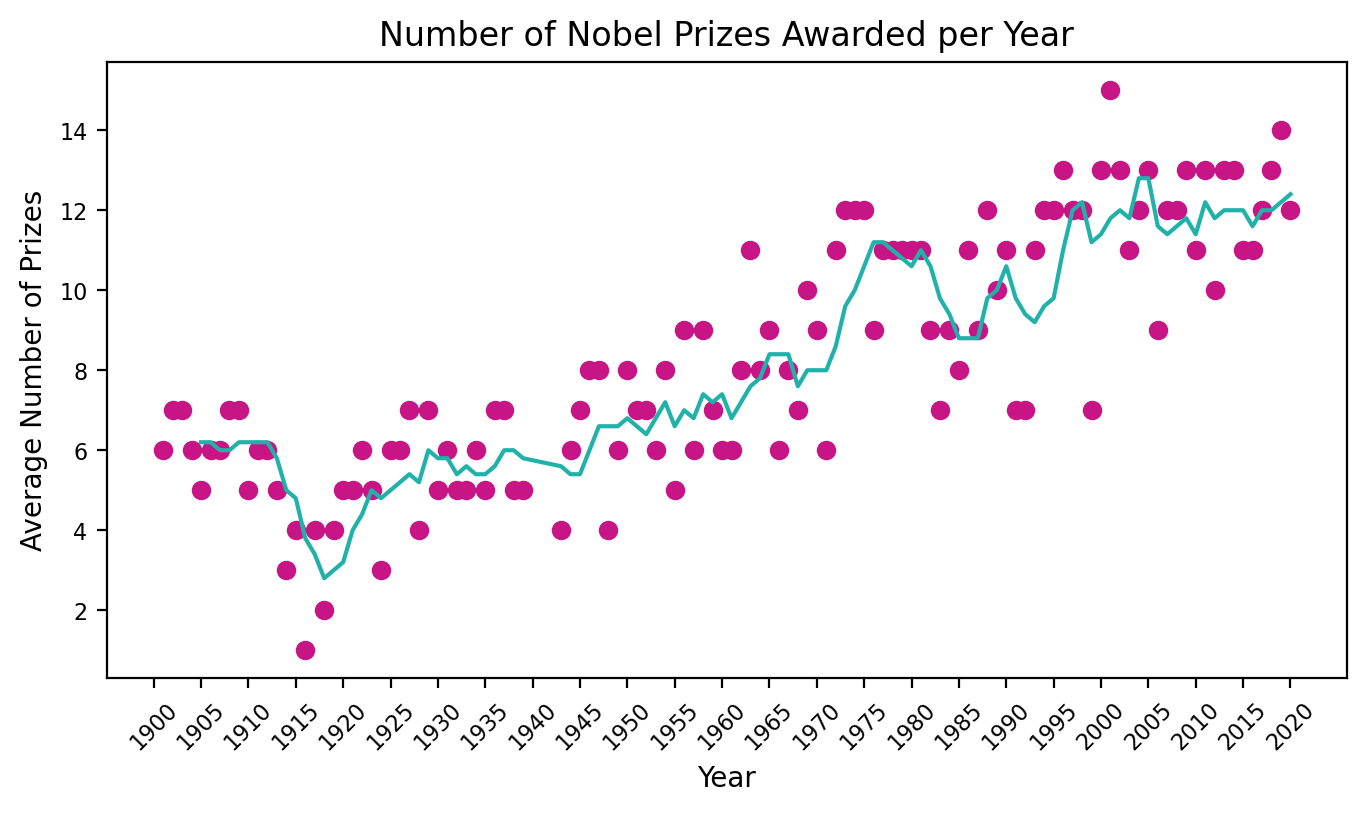

In [32]:
plt.figure(figsize=(8,4), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=12)
plt.yticks(fontsize=8)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=8, 
           rotation=45)

ax = plt.gca()
ax.set_xlabel("Year", fontsize=10)
ax.set_ylabel("Average Number of Prizes", fontsize=10)

ax.scatter(x=prize_per_year.index,
            y=prize_per_year.values,
            c="mediumvioletred")

ax.plot(prize_per_year.index,
         rolling_avg,
         c="lightseagreen")

plt.show()

From the chart it is clear that during both world wars (WW1 from 1914 to 1918 and WW2 from 1939 to 1945), there was a decrease in number of prizes given. Possible reasons could be :
1. Disruption of academic and scientific activities
2. Global instability
3. Several conflicts acorss the globe

## Are More Prizes Shared Than Before?

In [33]:
yearly_avg_share = df_data.groupby(by='year').agg({'share_pct': pd.Series.mean})
share_rolling_avg = yearly_avg_share.rolling(window=5).mean()

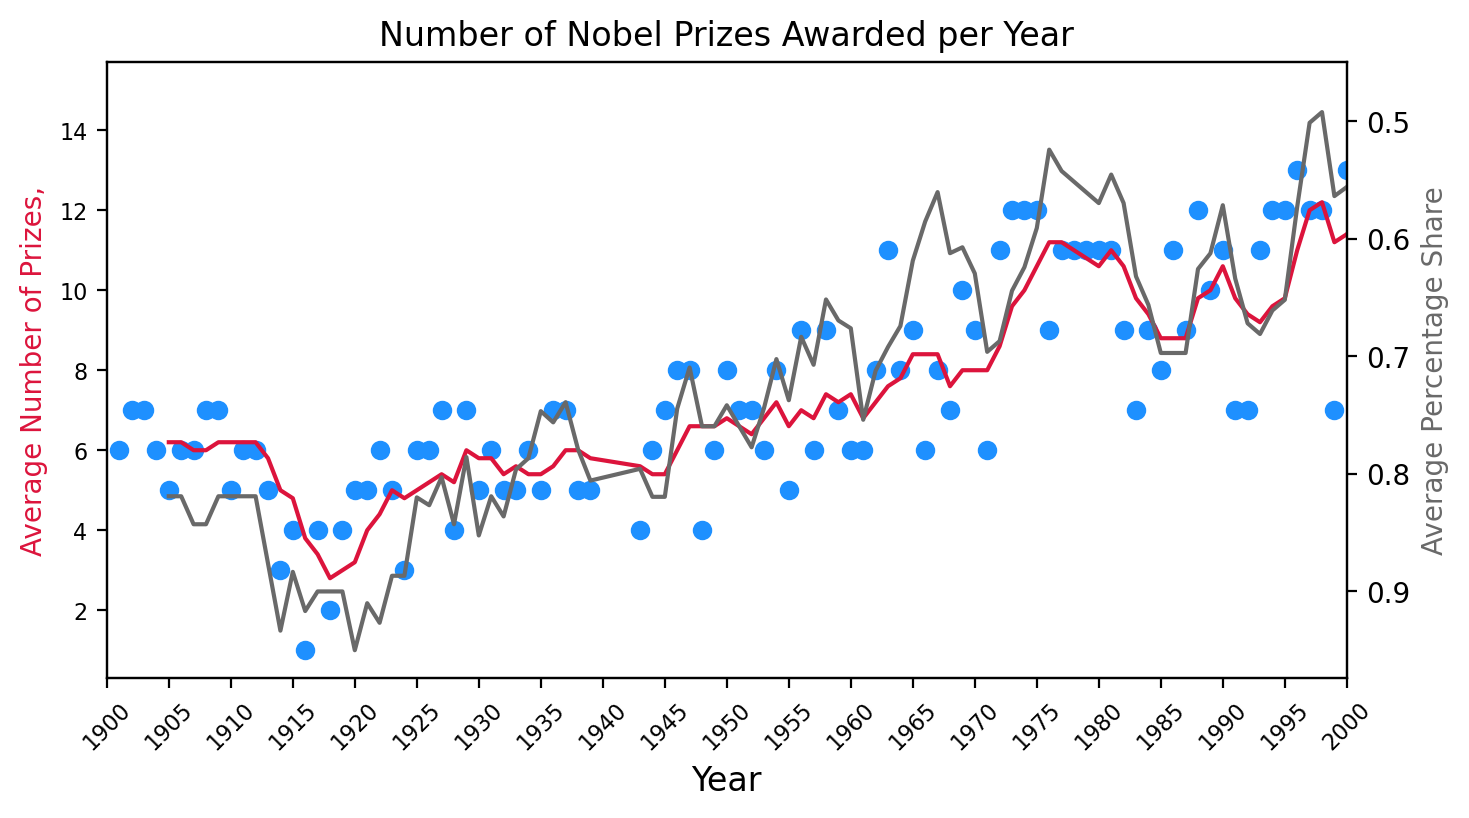

In [34]:

plt.figure(figsize=(8,4), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=12)
plt.yticks(fontsize=8)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=8, 
           rotation=45)

ax1 = plt.gca()
ax2 = plt.twinx()
ax1.set_xlim(1900, 2000)

ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Average Number of Prizes,", fontsize=10, c="crimson")
ax2.set_ylabel("Average Percentage Share", fontsize=10, c="dimgray")

ax2.invert_yaxis()

ax1.scatter(x=prize_per_year.index,
            y=prize_per_year.values,
            c="dodgerblue")

ax1.plot(prize_per_year.index,
         rolling_avg,
         c="crimson")

ax2.plot(prize_per_year.index,
         share_rolling_avg.values,
         c="dimgray")

plt.show()

It's clear that there is an upward trend in number of prizes every year.

# The Countries with the Most Nobel Prizes

In [35]:
all_countries = df_data.groupby(["birth_country_current"], as_index=False).agg({"prize": pd.Series.count})
all_countries.sort_values("prize", inplace=True)
top20_countries = all_countries[-20:]

In [36]:
h_bar = px.bar(x=top20_countries.prize,
               y=top20_countries.birth_country_current,
               orientation='h',
               color=top20_countries.prize,
               color_continuous_scale="balance")

h_bar.show()

The USA tops the chart with 281 Nobel prizes in its name. The UK and Germany follows with 105 and 84 prizes respectively

# Number of Prizes Won by Country

In [37]:
countries = df_data.groupby(["birth_country_current", "ISO"], as_index=False).agg({"prize": pd.Series.count})
countries.head()

birth_country_current  ISO  prize
0               Algeria  DZA      2
1             Argentina  ARG      4
2             Australia  AUS     10
3               Austria  AUT     18
4            Azerbaijan  AZE      1

In [38]:
countries_chmap = px.choropleth(countries,
                                locations="ISO",
                                color="prize",
                                hover_name="birth_country_current",
                                color_continuous_scale="ylorrd")

countries_chmap.show()

# In Which Categories are the Different Countries Winning Prizes? 

In [39]:
countries_cat = df_data.groupby(["birth_country_current", "category"], as_index=False).agg({"prize": pd.Series.count})
countries_cat.sort_values(by="prize", inplace=True, ascending=False)

In [40]:
cat_df = pd.merge(countries_cat, top20_countries, on="birth_country_current")

cat_df.columns = ["birth_country_current", "category", "cat_prize", "total_prize"]
cat_df.sort_values(by="total_prize", inplace=True)

In [41]:
cat_bar = px.bar(x=cat_df.cat_prize,
                  y=cat_df.birth_country_current,
                  orientation="h",
                  color=cat_df.category,
                  title="Top 20 countries by Number of Prizes and Category")

cat_bar.update_layout(xaxis_title = "Number of Prizes",
                      yaxis_title = "Country Name")

cat_bar.show()

# Number of Prizes Won by Each Country Over Time

In [42]:
prize_by_year = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]
prize_by_year.head()

year birth_country_current  prize
118  1901                France      2
346  1901                Poland      1
159  1901               Germany      1
312  1901           Netherlands      1
440  1901           Switzerland      1

In [43]:
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current',
                                              'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True) 
cumulative_prizes.head()

birth_country_current  year  prize
0               Algeria  1957      1
1               Algeria  1997      2
2             Argentina  1936      1
3             Argentina  1947      2
4             Argentina  1980      3

In [44]:
l_chart = px.line(cumulative_prizes,
                  x='year', 
                  y='prize',
                  color='birth_country_current',
                  hover_name='birth_country_current')
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Prizes')
 
l_chart.show()

# What are the Top Research Organisations?

In [45]:
top20_orgs = df_data.organization_name.value_counts()[:20]
top20_orgs.sort_values(ascending=True, inplace=True)

In [46]:
org_bar = px.bar(x = top20_orgs.values,
                 y = top20_orgs.index,
                 orientation='h',
                 color=top20_orgs.values,
                 color_continuous_scale=px.colors.sequential.haline,
                 title='Top 20 Research Institutions by Number of Prizes')
 
org_bar.update_layout(xaxis_title='Number of Prizes', 
                      yaxis_title='Institution',
                      coloraxis_showscale=False)
org_bar.show()

# Which Cities do the most research?

In [47]:
top20_org_cities = df_data.organization_city.value_counts()[:20]
top20_org_cities.sort_values(ascending=True, inplace=True)
city_bar2 = px.bar(x = top20_org_cities.values,
                  y = top20_org_cities.index,
                  orientation='h',
                  color=top20_org_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Which Cities Do the Most Research?')
 
city_bar2.update_layout(xaxis_title='Number of Prizes', 
                       yaxis_title='City',
                       coloraxis_showscale=False)
city_bar2.show()

# Top Birth Cities of Nobel Laureates

In [48]:
top20_cities = df_data.birth_city.value_counts()[:20]
top20_cities.sort_values(ascending=True, inplace=True)
city_bar = px.bar(x=top20_cities.values,
                  y=top20_cities.index,
                  orientation='h',
                  color=top20_cities.values,
                  color_continuous_scale="jet",
                  title='Where were the Nobel Laureates Born?')
 
city_bar.update_layout(xaxis_title='Number of Prizes', 
                       yaxis_title='City of Birth',
                       coloraxis_showscale=False)
city_bar.show()

# Where do Discoveries take place?

In [49]:
country_city_org = df_data.groupby(by=['organization_country', 
                                       'organization_city', 
                                       'organization_name'], as_index=False).agg({'prize': pd.Series.count})
 
country_city_org = country_city_org.sort_values('prize', ascending=False)
country_city_org.head()

organization_country organization_city  \
205  United States of America     Cambridge, MA   
280  United States of America      Stanford, CA   
206  United States of America     Cambridge, MA   
209  United States of America       Chicago, IL   
195  United States of America      Berkeley, CA   

                               organization_name  prize  
205                           Harvard University     29  
280                          Stanford University     23  
206  Massachusetts Institute of Technology (MIT)     21  
209                        University of Chicago     20  
195                     University of California     19

In [50]:
burst = px.sunburst(country_city_org, 
                    path=['organization_country', 'organization_city', 'organization_name'], 
                    values='prize',
                    title='Where do Discoveries Take Place?',
                   )
 
burst.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False)
 
burst.show()

# Patterns in the Laureate Age at the Time of the Award

In [51]:
birth_year = df_data.birth_date.dt.year

In [52]:
df_data['winning_age'] = df_data.year - birth_year

In [53]:
df_data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

In [54]:
df_data[df_data.winning_age == 97.00]['full_name']

937    John Goodenough
Name: full_name, dtype: object

In [55]:
df_data[df_data.winning_age == 17.00]["full_name"]

885    Malala Yousafzai
Name: full_name, dtype: object

* The name of the oldest laureate is John Goodenough.
* The name of the youngest laureate is Malala Yousasfzai.
* The average age of a winner is approximately 60 years.
* 75% of the laureates won prize when they were 69 years old or younger.

## Distribution of Laureate Age at the Time of Winning

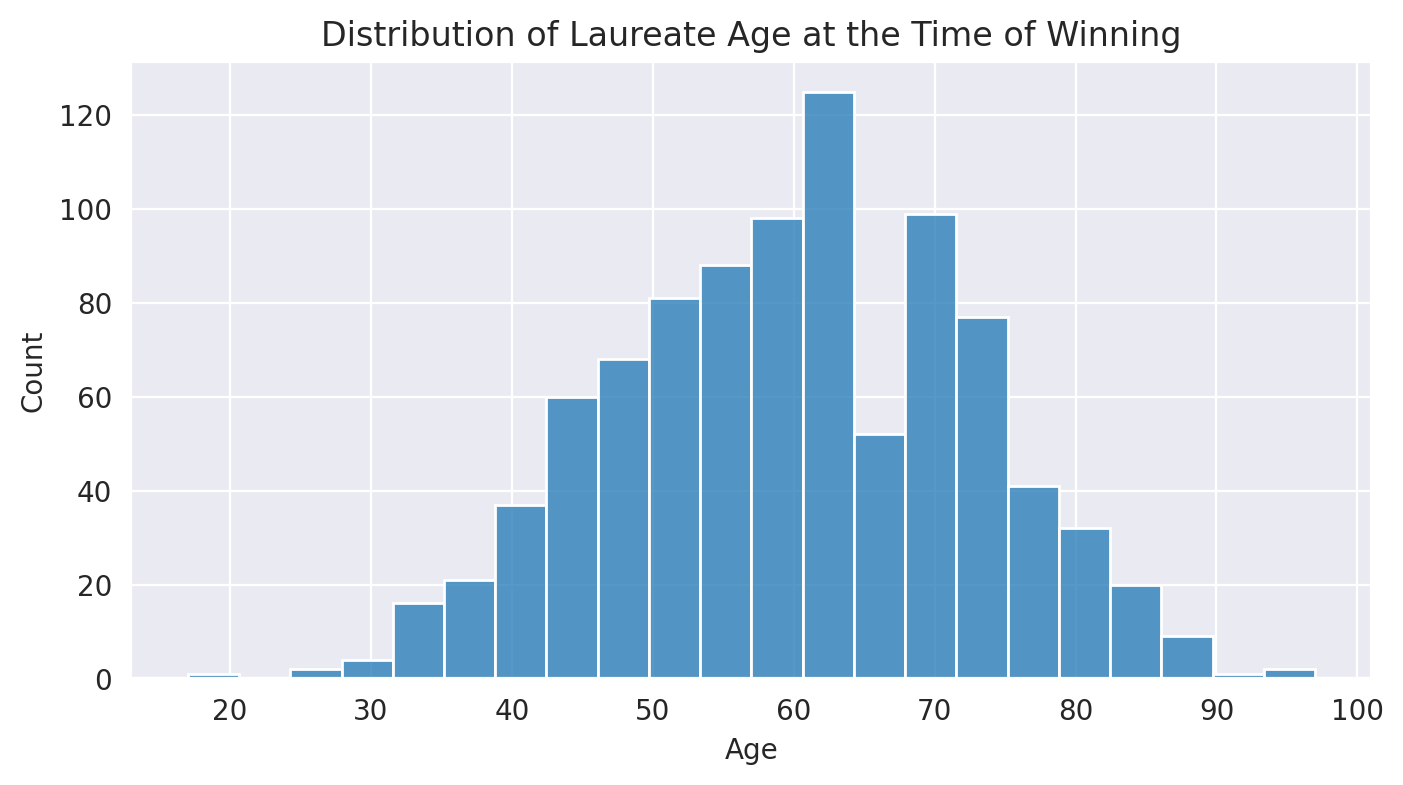

In [56]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
    hist = sns.histplot(data=df_data, x="winning_age", bins="auto")
    
plt.title("Distribution of Laureate Age at the Time of Winning")
plt.xlabel("Age")
    
plt.show()

## Age at Time of Award throughout History

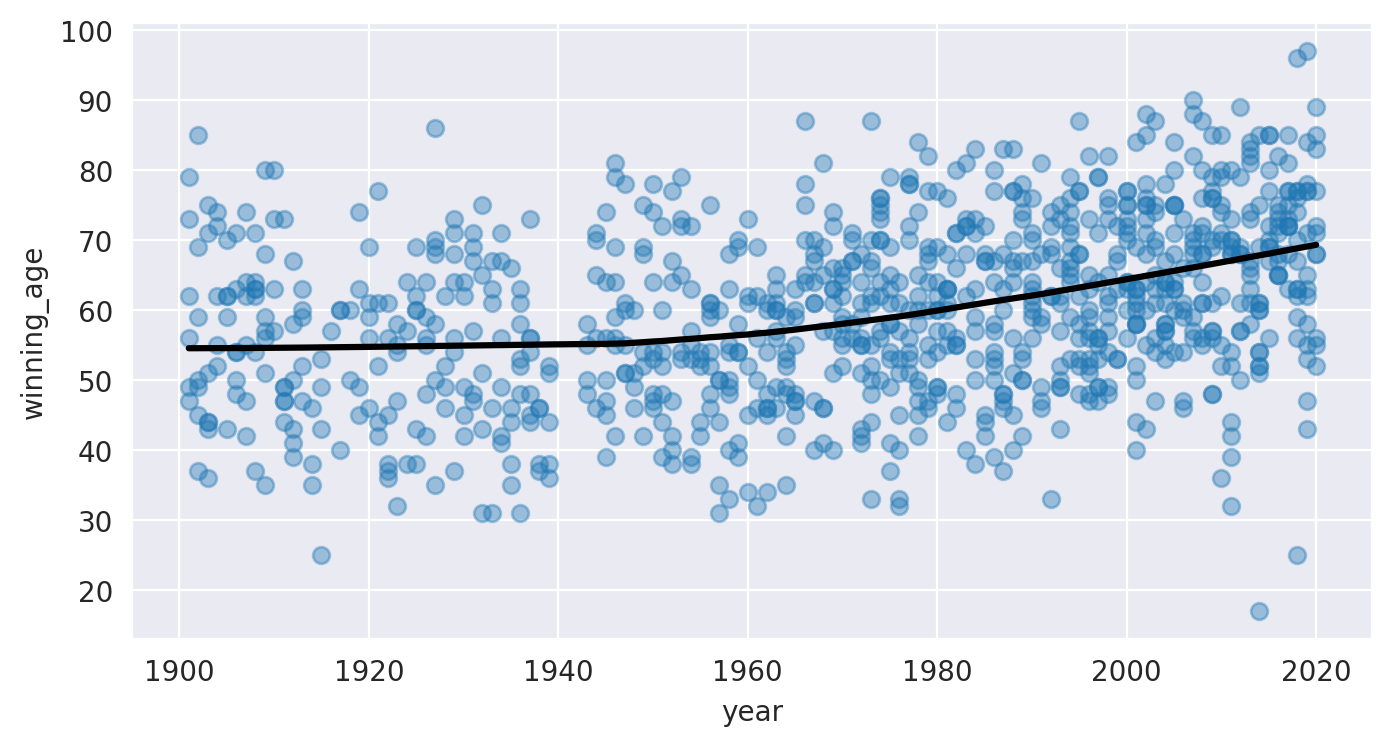

In [57]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
    sns.regplot(data=df_data,
                x='year',
                y='winning_age',
                lowess=True, 
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})
 
plt.show()

**Observation:**  
It clearly shows how the Nobel laureates are getting their award later and later in life. From 1900 to around 1950, the laureates were around 55 years old, but these days they are closer to 70 years old when they get their award.  
The other thing that we see in the chart is that in the last 10 years the spread has increased. We've had more very young and very old winners.

## Winning Age Across the Nobel Prize Categories

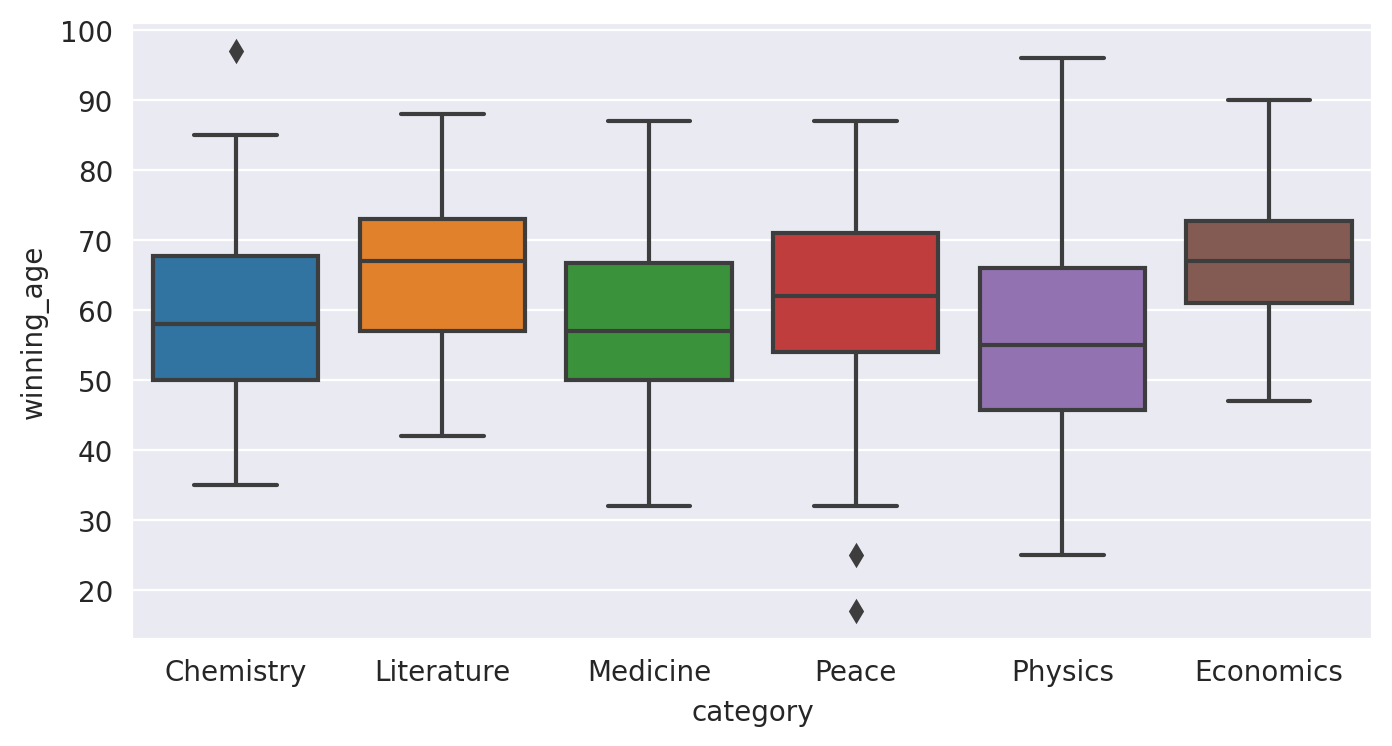

In [58]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
    sns.boxplot(data=df_data,
                x='category',
                y='winning_age')
 
plt.show()

### Winning Age Trends in Different Categories

C:\Users\khush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1600x800 with 0 Axes>

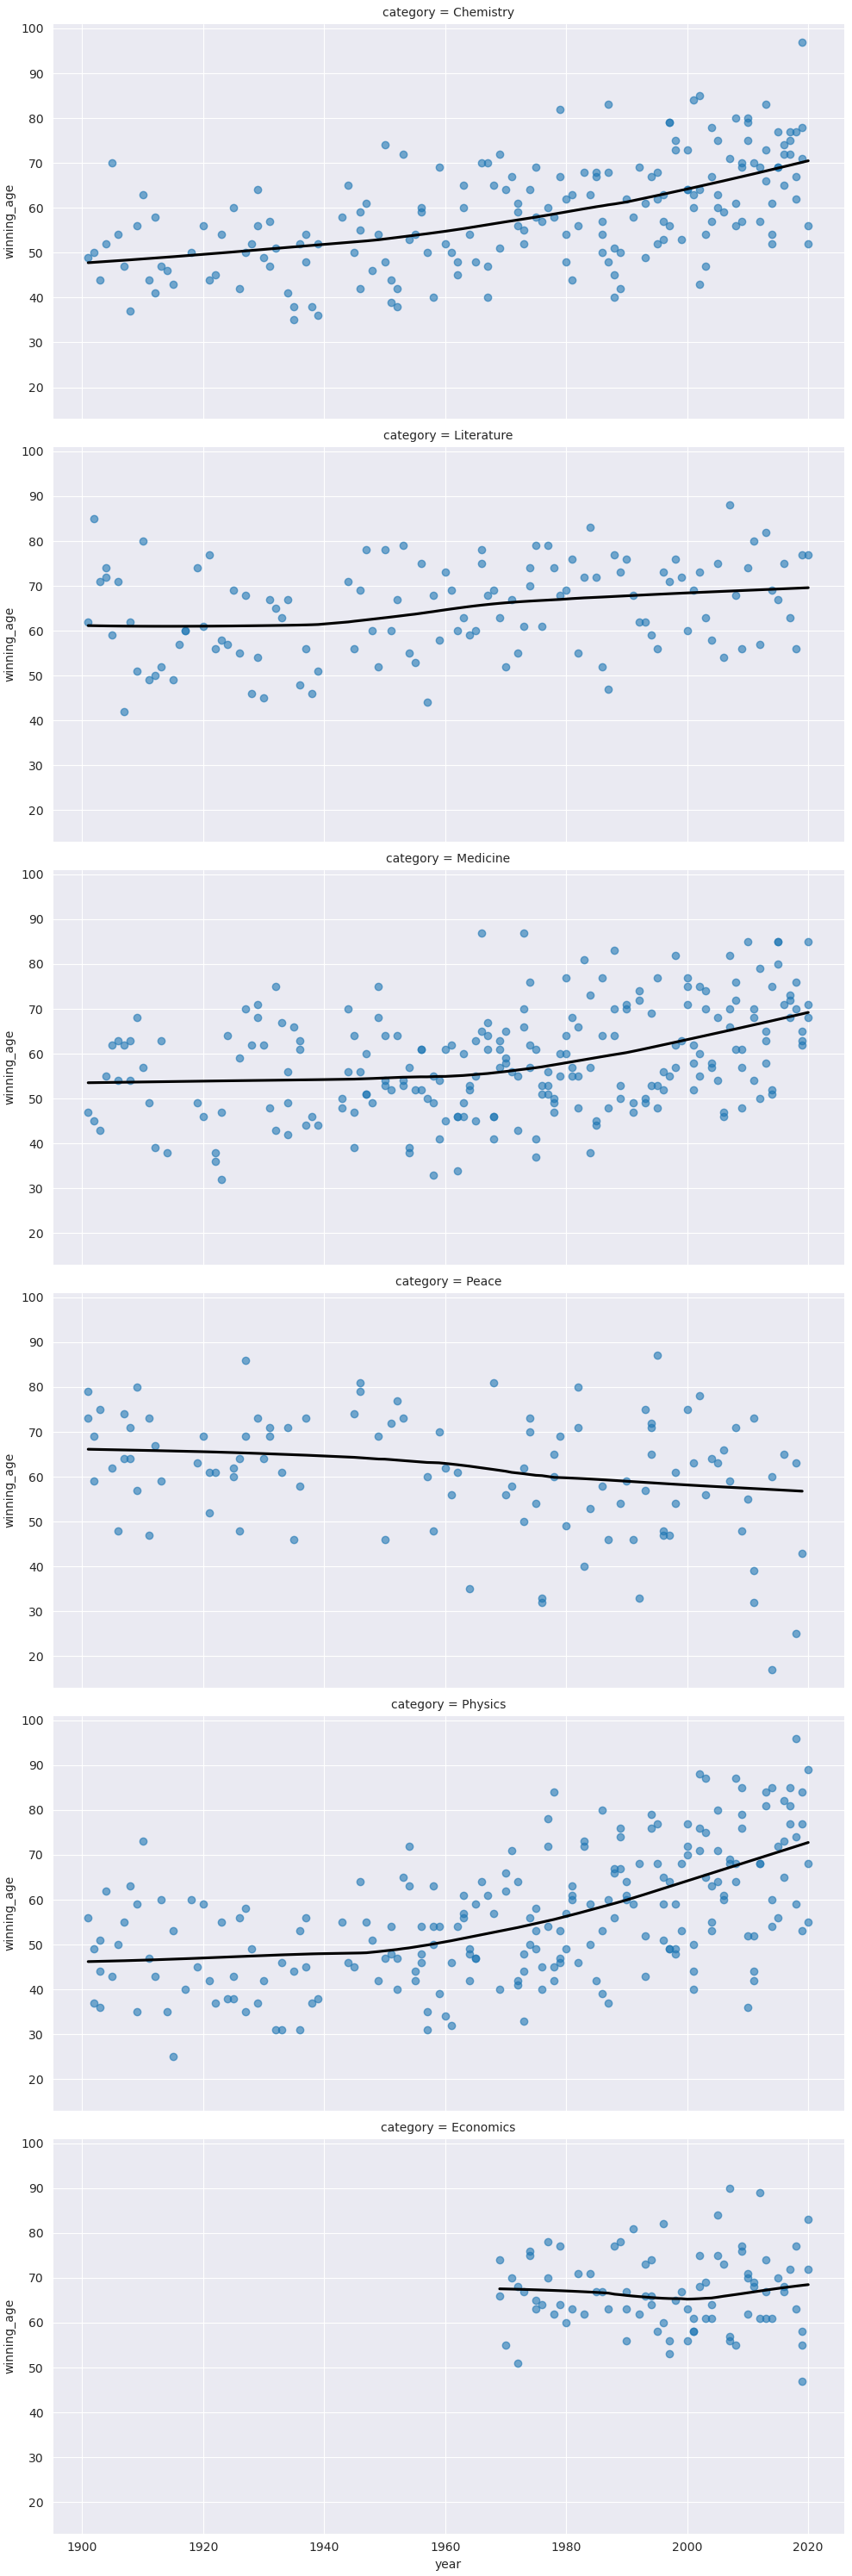

In [59]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
    sns.lmplot(data=df_data,
               x='year', 
               y='winning_age',
               row = 'category',
               lowess=True, 
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)
 
plt.show()

C:\Users\khush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1600x800 with 0 Axes>

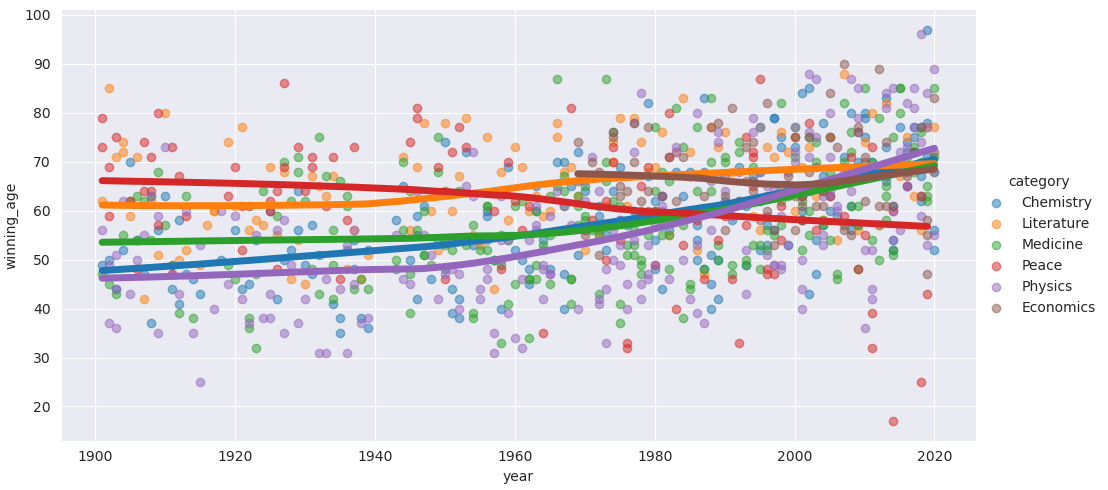

In [60]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
    sns.lmplot(data=df_data,
               x='year',
               y='winning_age',
               hue='category',
               lowess=True, 
               aspect=2,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth': 5})
 
plt.show()

# Conclusion

The analysis of Nobel Prize data offers a glimpse into the historical significance of the awards, tracing back to Alfred Nobel's legacy and the establishment of the prizes in 1895. Through the years, the Nobel Prizes have evolved to encompass various fields, reflecting the changing landscape of human endeavors and contributions.

#### Gender Disparity:
One of the notable findings is the persistent gender disparity among Nobel laureates. Despite advancements in gender equality, the data reveals a stark difference in the representation of male and female laureates. The analysis highlights the need for continued efforts to address gender imbalances in scientific and academic recognition.

#### Category Insights:
The examination of prize distribution across categories sheds light on the trends and preferences within the Nobel Prize committee. Medicine emerges as the category with the highest number of prizes, underscoring the significance of advancements in health and life sciences. Conversely, economics, introduced later in 1969, exhibits fewer laureates, reflecting its status as a relatively newer addition to the Nobel Prize categories.

#### Geographical Influence:
Geographical patterns in Nobel Prize distribution offer insights into the global landscape of academic and scientific achievements. The dominance of certain countries, such as the United States, the United Kingdom, and Germany, underscores the influence of established research infrastructure, educational systems, and scientific communities in shaping Nobel laureates.

#### Age Trends:
A significant trend observed in the analysis is the increasing age of Nobel laureates over time. From the early 20th century to the present day, there is a noticeable shift towards older laureates receiving the awards. This trend may reflect advancements in longevity, career durations, and the recognition of lifetime achievements in various fields.

#### Implications and Future Directions:
The findings of this analysis offer valuable insights into the dynamics of Nobel Prize distribution, spanning gender representation, category preferences, geographical influences, and age trends. These insights can inform discussions on diversity and inclusion in academia, research funding allocations, and the recognition of scientific contributions.

Future research could delve deeper into specific categories or explore interdisciplinary collaborations among laureates. Additionally, ongoing efforts to address gender disparities and promote diversity in scientific and academic fields remain critical for fostering innovation and progress on a global scale.